In [1]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping

2024-06-12 18:00:53.744754: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-12 18:00:53.744915: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-12 18:00:53.928570: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/Zomato Dataset.csv


In [3]:
# Load dataset
df = pd.read_csv("/kaggle/input/Zomato Dataset.csv")

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort by date
df = df.sort_values('Date')

# Use only 'Close' price for prediction
data = df['Close'].values
data = data.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Create sequences
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        labels.append(data[i+seq_length])
    return np.array(sequences), np.array(labels)

seq_length = 60
x_train, y_train = create_sequences(train_data, seq_length)
x_test, y_test = create_sequences(test_data, seq_length)

# Reshape for LSTM input
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

/tmp/ipykernel_18/1790086639.py:5: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


In [4]:
# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Set early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=(x_test, y_test), callbacks=[early_stop])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 0.0381 - val_loss: 0.0804
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0046 - val_loss: 0.0085
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0019 - val_loss: 0.0055
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0015 - val_loss: 0.0043
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0019 - val_loss: 0.0026
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0019 - val_loss: 0.0030
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0013 - val_loss: 0.0026
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0013 - val_loss: 0.0026
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0014 - val_loss: 0.0101
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0014 - val_loss: 0.0036
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0015 - val_loss: 0.0020
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


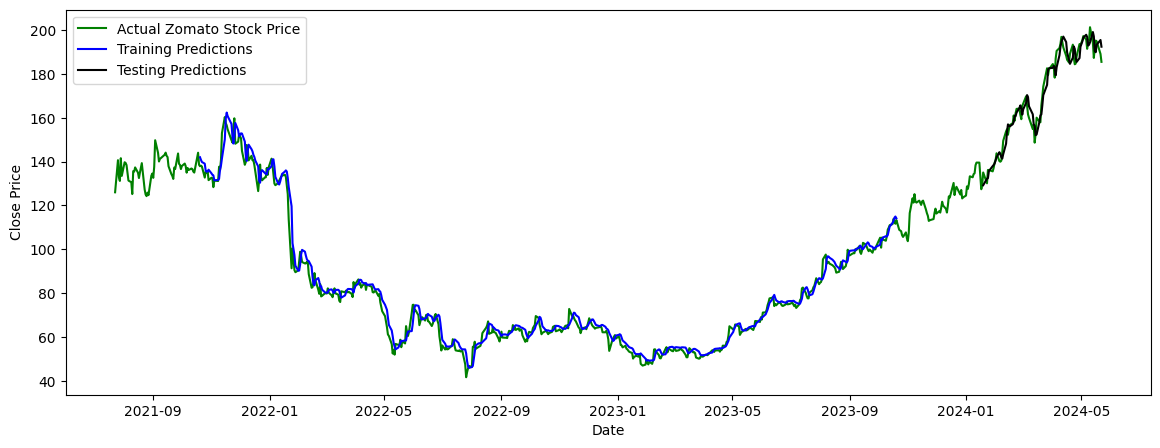

In [5]:
# Make predictions
train_predictions = model.predict(x_train)
test_predictions = model.predict(x_test)

# Invert scaling to get actual values
train_predictions = scaler.inverse_transform(train_predictions)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
test_predictions = scaler.inverse_transform(test_predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(14, 5))
plt.plot(df['Date'], data, color='green', label='Actual Zomato Stock Price')
train_dates = df['Date'][:train_size].values[seq_length:]
test_dates = df['Date'][train_size:].values[seq_length:]
plt.plot(train_dates, train_predictions, color='blue', label='Training Predictions')
plt.plot(test_dates, test_predictions, color='black', label='Testing Predictions')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [6]:
# Calculate RMSE
from sklearn.metrics import mean_squared_error

train_rmse = np.sqrt(mean_squared_error(y_train_actual, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test_actual, test_predictions))

print(f'Training RMSE: {train_rmse}')
print(f'Testing RMSE: {test_rmse}')

Training RMSE: 3.5764082936509523
Testing RMSE: 4.241635837780461
